<a href="https://colab.research.google.com/github/rueshi1/oasis_internship/blob/main/Project_3_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
from google.colab import files
uploaded = files.upload()


Saving AB_NYC_2019.csv.zip to AB_NYC_2019.csv (2).zip


In [18]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [19]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 48895
Columns: 16


In [20]:
print("Duplicate rows:", df.duplicated().sum())
print("\nMissing values per column:\n")
df.isnull().sum()


Duplicate rows: 0

Missing values per column:



,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


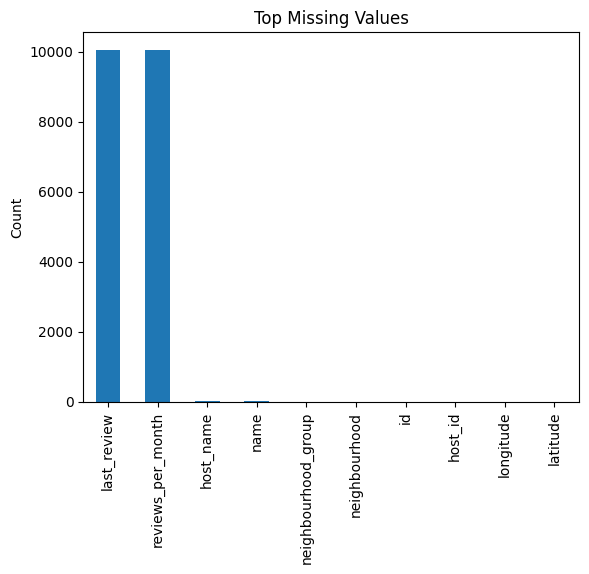

In [21]:
df.isnull().sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Missing Values")
plt.ylabel("Count")
plt.show()


In [23]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [53]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print("Records before:", before)
print("Records after:", after)


Records before: 31
Records after: 31


In [24]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print("Records before:", before)
print("Records after:", after)


Records before: 48895
Records after: 48895


In [25]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,the village of harlem....new york !,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,cozy entire floor of brownstone,4869,lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,2018-11-19,0.100000,1,0


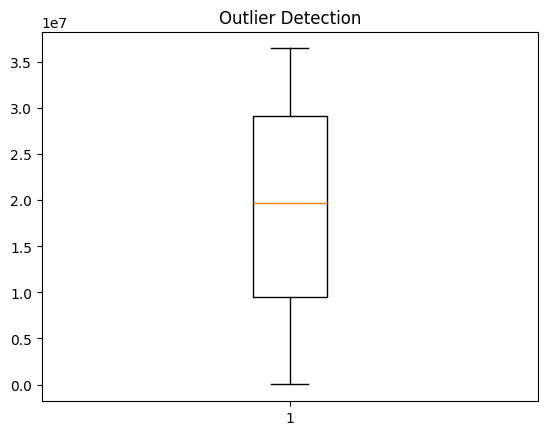

In [26]:
plt.boxplot(df[num_cols[0]])
plt.title("Outlier Detection")
plt.show()


In [27]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |
          (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [28]:
print("Final records:", df.shape[0])


Final records: 27049


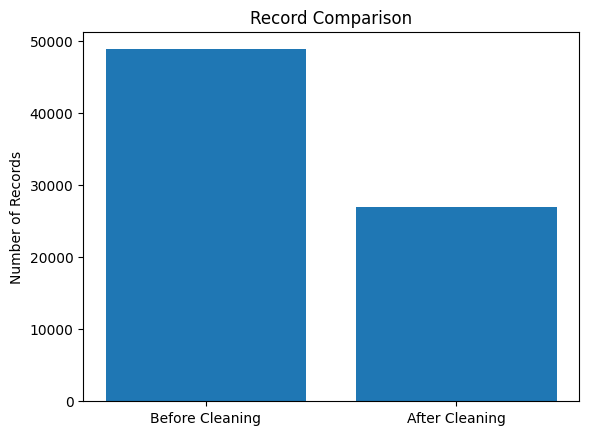

In [29]:
plt.bar(["Before Cleaning", "After Cleaning"], [before, df.shape[0]])
plt.title("Record Comparison")
plt.ylabel("Number of Records")
plt.show()


In [30]:
df.to_csv("cleaned_data.csv", index=False)
files.download("cleaned_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
from google.colab import files
uploaded = files.upload()

Saving CA_category_id.json to CA_category_id.json


In [39]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# Load JSON file
with open("CA_category_id.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# View raw structure
data.keys()


dict_keys(['kind', 'etag', 'items'])

In [41]:
# Extract items
items = data["items"]

# Normalize JSON
df = pd.json_normalize(items)

# Display first rows
df.head()


,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [42]:
df = df[['id', 'snippet.title', 'snippet.assignable']]

df.columns = ['category_id', 'category_name', 'assignable']

df.head()


,category_id,category_name,assignable
0,1,Film & Animation,True
1,2,Autos & Vehicles,True
2,10,Music,True
3,15,Pets & Animals,True
4,17,Sports,True


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    31 non-null     object
 1   category_name  31 non-null     object
 2   assignable     31 non-null     bool  
dtypes: bool(1), object(2)
memory usage: 659.0+ bytes


In [44]:
# Check missing values
df.isnull().sum()


,0
category_id,0
category_name,0
assignable,0


In [45]:
# Check duplicates
df.duplicated().sum()


np.int64(0)

In [46]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)


In [47]:
# Standardize category names
df['category_name'] = df['category_name'].str.lower()

df.head()


,category_id,category_name,assignable
0,1,film & animation,True
1,2,autos & vehicles,True
2,10,music,True
3,15,pets & animals,True
4,17,sports,True


In [48]:
# Check unique categories
df['category_name'].value_counts()


,count
category_name,
comedy,2
film & animation,1
music,1
pets & animals,1
sports,1
autos & vehicles,1
short movies,1
travel & events,1
videoblogging,1


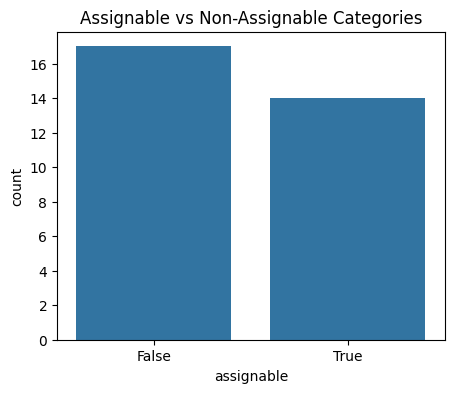

In [49]:
plt.figure(figsize=(5,4))
sns.countplot(x='assignable', data=df)
plt.title("Assignable vs Non-Assignable Categories")
plt.show()


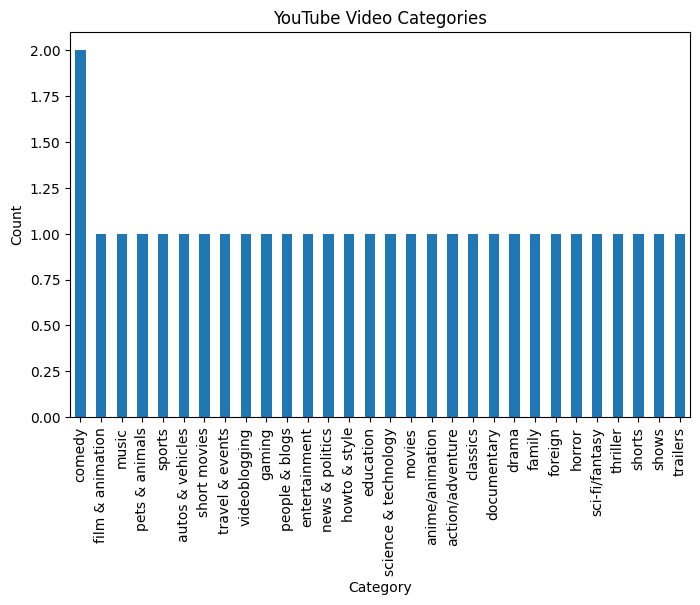

In [50]:
plt.figure(figsize=(8,5))
df['category_name'].value_counts().plot(kind='bar')
plt.title("YouTube Video Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


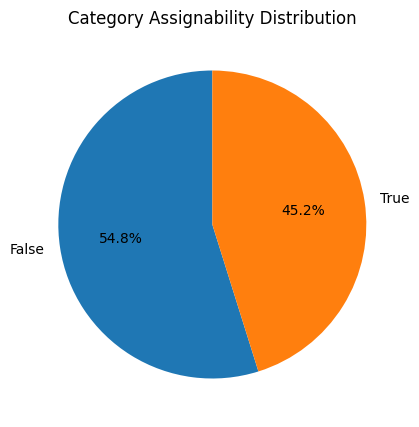

In [51]:
plt.figure(figsize=(5,5))
df['assignable'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Category Assignability Distribution")
plt.ylabel("")
plt.show()


In [52]:
df.to_csv("cleaned_CA_category_id.csv", index=False)
